In [1]:
import __init__

In [2]:
import math
import cmath
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors

from distances import distances
from waveforms import waveforms
from figures import figures

In [3]:
cosmo_params = {
    'redshift' : np.linspace(0,4),
    'frequency': np.linspace(10e0,10e4),
    'f_e' : 1,
    't_e' : 1,
    't_a' : 2,
}
phenom_params = {
    'A' : 4, 
    'alpha' : 4,
    'lambda_g' : 1.6 * 10 ** 16,
} 
wf_params = {
        'approximant': 'TaylorF2',
        'mass1': 10,
        'mass2': 15,
        'delta_f': 1.0 / 170, 
        'f_lower': 40,
}

In [4]:
fig = figures(cosmo_params, phenom_params, wf_params)
wf = waveforms(cosmo_params, phenom_params, wf_params)

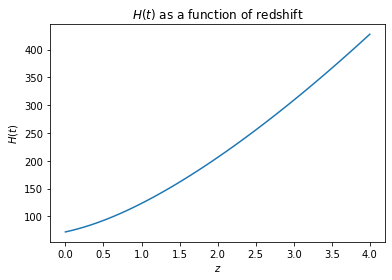

In [5]:
fig.scale_factor()

In [6]:
# plt.alpha_distance_ratio()
# change to gradient to show which appears more red/blue-shifted
# smaller values of alpha would make object appear more blueshifted (gets to high redshift faster)

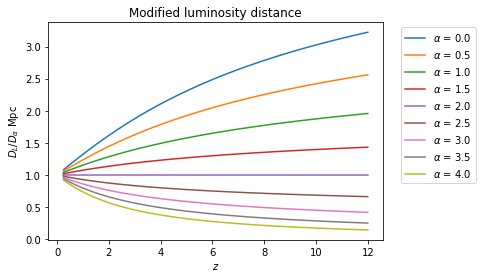

In [7]:
dist = distances(cosmo_params, phenom_params)

alpha_values = np.arange(0, 4.5, .5)  # alpha values end at 4, per GR tests paper specs
for a in alpha_values: 
    D_l = dist.luminosity(dist.z)
    D_a = dist.mod_luminosity(dist.z, a)
    results = np.divide(D_l[1:], D_a[1:])  # division by zero error, skip first element
    # results = np.insert(results, 0, 0, axis=None)
    plt.plot(np.hstack(np.linspace(0,12)[1:]), np.hstack(results), label=r'$\alpha$ = '+str(a))#, c=colors.Colormap('coolwarm'))

plt.xlabel(r'$z$')
plt.ylabel(r'$D_L / D_{\alpha}$ Mpc')
plt.title('Modified luminosity distance')
    # handles, labels = plt.gca().get_legend_handles_labels()
    # plt.gca().legend(handles=handles[::-1], labels=labels[::-1])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [8]:
dist.alpha

4

In [9]:
dist.A

4

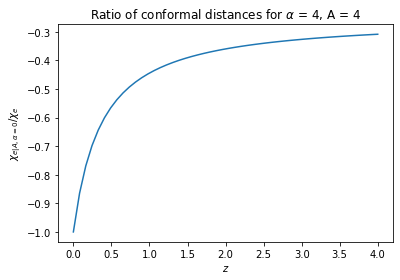

In [10]:
fig.chi_ratio()

/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:95: RuntimeWarning: divide by zero encountered in true_divide
  return math.sqrt(math.pi / 30) * (self.chirp_mass ** 2 / D_L)


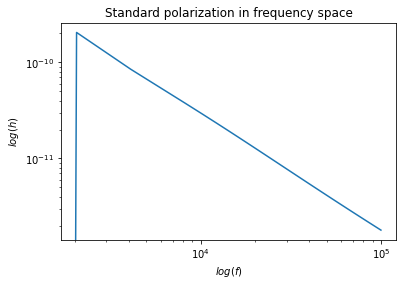

In [11]:
fig.h_standard()

/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:95: RuntimeWarning: divide by zero encountered in true_divide
  return math.sqrt(math.pi / 30) * (self.chirp_mass ** 2 / D_L)


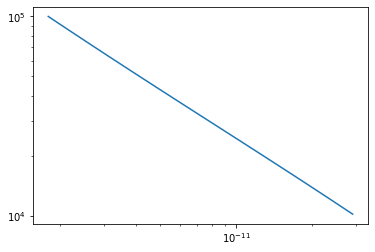

In [12]:
plus, cross = wf.h_standard()

plt.plot(plus[5:], wf.f[5:])
plt.xscale('log')
plt.yscale('log')